In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng


import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn



In [2]:
!ls 20.08.16_mpsa_data/brca*

20.08.16_mpsa_data/brca2_lib1_rep1.csv 20.08.16_mpsa_data/brca2_lib2_rep1.csv
20.08.16_mpsa_data/brca2_lib1_rep2.csv 20.08.16_mpsa_data/brca2_lib2_rep2.csv
20.08.16_mpsa_data/brca2_lib1_rep3.csv 20.08.16_mpsa_data/brca2_lib2_rep3.csv


In [3]:
MPSA_data_lib1_rep1 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep1.csv')
MPSA_data_lib1_rep2 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep2.csv')
MPSA_data_lib1_rep3 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep3.csv')

MPSA_data_lib2_rep1 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep1.csv')
MPSA_data_lib2_rep2 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep2.csv')
MPSA_data_lib2_rep3 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep3.csv')


In [4]:
#MPSA_data_rep1.merge(MPSA_data_rep2,on='ss',how='outer').head()

In [5]:
#MPSA_data_rep1.head(3)

In [6]:
#MPSA_data_rep2.head(3)

In [7]:
#MPSA_data_rep3.head()

In [8]:
#len(MPSA_data_rep1),len(MPSA_data_rep2),len(MPSA_data_rep3)

### Redo merge as outer join and allow nans

In [9]:
# X = MPSA_data['ss'].values
# y = MPSA_data['log_psi'].values

# #MPSA_df = MPSA_data_rep1.merge(MPSA_data_rep2,on='ss').
# MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep3,on='ss',how='outer')                    
            
    
#MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss')
MPSA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer') \
                             .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
                             .merge(MPSA_data_lib2_rep3,on='ss',how='outer')        

print(len(MPSA_df))                
MPSA_df.head()

26661


,ss,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y,log_psi_x,dlog_psi_x,log_psi_y,dlog_psi_y
0,AAAGCAAAA,-3.751854,0.444200,-3.115981,0.404293,-2.690113,0.649725,-2.238407,0.463122,-2.900128,0.667861,-0.824806,0.194917
1,AAAGCAAAC,-2.697741,0.369972,-2.991176,0.552104,-1.690878,0.212487,-1.741498,0.834194,-4.394449,0.375559,-0.813106,0.274446
2,AAAGCAAAG,-2.242947,0.575121,-2.666159,0.413834,-1.716336,0.316662,-3.850148,0.751362,-4.934474,0.266520,-1.062409,0.279566
3,AAAGCAAAT,-3.067251,0.357014,-2.823078,0.343901,-1.837513,0.206056,-3.044522,0.680854,-5.493061,0.230119,-1.241713,0.151308
4,AAAGCAACA,-2.987074,0.472637,-2.489996,0.368131,-2.186586,0.266041,-2.619385,0.631789,-3.571543,0.748902,-1.351066,0.219278


In [10]:
MPSA_df.dropna(inplace=True)
print(len(MPSA_df))  

20700


In [11]:
MPSA_df.columns = ['ss', 'log_psi__lib_1_rep1', 'dlog_psi_x', 'log_psi__lib_1_rep2', 'dlog_psi_y', 'log_psi__lib_1_rep3',
       'dlog_psi_x', 'log_psi__lib_2_rep1', 'dlog_psi_y', 'log_psi__lib_2_rep2', 'dlog_psi_x',
       'log_psi__lib_2_rep3', 'dlog_psi_y']


In [12]:
X = MPSA_df['ss'].values
y1 = MPSA_df['log_psi__lib_1_rep1'].values
y2 = MPSA_df['log_psi__lib_1_rep2'].values
y3 = MPSA_df['log_psi__lib_1_rep3'].values

y4 = MPSA_df['log_psi__lib_2_rep1'].values
y5 = MPSA_df['log_psi__lib_2_rep2'].values
y6 = MPSA_df['log_psi__lib_2_rep3'].values

In [13]:
diag = np.linspace(min(y1),max(y1),100)

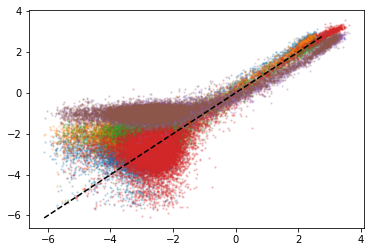

In [14]:
plt.scatter(y1,y2,s=2,alpha=0.2)
plt.scatter(y1,y3,s=2,alpha=0.2)
plt.scatter(y2,y3,s=2,alpha=0.2)

plt.scatter(y4,y5,s=2,alpha=0.2)
plt.scatter(y4,y6,s=2,alpha=0.2)
plt.scatter(y5,y6,s=2,alpha=0.2)

plt.plot(diag,diag,'--',color='black')
plt.show()

In [15]:
# y = np.hstack(
#     (y1.reshape(-1,1),
#      y2.reshape(-1,1),
#      y3.reshape(-1,1),
#      y4.reshape(-1,1),
#      y5.reshape(-1,1),
#      y6.reshape(-1,1)))

y = np.hstack(
    (y1.reshape(-1,1),
     y2.reshape(-1,1)))


In [16]:
y.shape

(20700, 2)

In [17]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Get sequence length
L = len(X[0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='dna',
                     gpmap_type='pairwise', 
                     regression_type='Multi_y_phi_GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2,
                     number_of_replicate_targets = y_train.shape[1])

0 1
1 2


In [19]:
model.get_nn().summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 38)]         0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 36)           0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
multi__pairwise_gp_map_layer (M (None, 2)            2666        Sequence_only[0][0]              
__________________________________________________________________________________________________
multi_phi_global_epistasis_laye (None, 1)            201         multi__pairwise_gp_map_layer[0][0
______________________________________________________________________________________________

In [20]:
# Set training data
model.set_data(x=x_train,
               #y=[y_train[:,x] for x in range(y_train.shape[1])],
               y=y_train,
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 16,560 observations set as training data.
Using 20.1% for validation.
Time to set data: 0.0629 sec.


In [21]:
# import tensorflow as tf
# tf.keras.utils.plot_model(model.get_nn(), show_shapes=False)

In [22]:
# Fit model to data
model.fit(learning_rate=.00001,
          epochs=1500,
          batch_size=100,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/1500
133/133 [==============================] - 4s 9ms/step - loss: 357.7353 - skewed_t_noise_model_layer_loss: 162.6437 - skewed_t_noise_model_layer_1_loss: 172.6899 - I_var: nan - val_loss: 348.5177 - val_skewed_t_noise_model_layer_loss: 157.9274 - val_skewed_t_noise_model_layer_1_loss: 168.2361 - val_I_var: nan
Epoch 2/1500
133/133 [==============================] - 0s 3ms/step - loss: 349.1649 - skewed_t_noise_model_layer_loss: 158.3057 - skewed_t_noise_model_layer_1_loss: 168.5204 - I_var: nan - val_loss: 340.4742 - val_skewed_t_noise_model_layer_loss: 153.9000 - val_skewed_t_noise_model_layer_1_loss: 164.2818 - val_I_var: nan
Epoch 3/1500
133/133 [==============================] - 0s 3ms/step - loss: 340.0266 - skewed_t_noise_model_layer_loss: 153.6839 - skewed_t_noise_model_layer_1_loss: 164.0654 - I_var: nan - val_loss: 333.5601 - val_skewed_t_noise_model_layer_loss: 150.5021 - val_skewed_t_noise_model_layer_1_loss: 160.8261 - val_I_var: nan
Epoch 4/1500
133/133 [======

133/133 [==============================] - 0s 3ms/step - loss: 284.7404 - skewed_t_noise_model_layer_loss: 130.1088 - skewed_t_noise_model_layer_1_loss: 133.6075 - I_var: nan - val_loss: 283.5235 - val_skewed_t_noise_model_layer_loss: 129.5706 - val_skewed_t_noise_model_layer_1_loss: 132.9681 - val_I_var: nan
Epoch 27/1500
133/133 [==============================] - 0s 3ms/step - loss: 284.6541 - skewed_t_noise_model_layer_loss: 130.1389 - skewed_t_noise_model_layer_1_loss: 133.5435 - I_var: nan - val_loss: 282.8836 - val_skewed_t_noise_model_layer_loss: 129.3106 - val_skewed_t_noise_model_layer_1_loss: 132.6407 - val_I_var: nan
Epoch 28/1500
133/133 [==============================] - 0s 3ms/step - loss: 284.6601 - skewed_t_noise_model_layer_loss: 130.2156 - skewed_t_noise_model_layer_1_loss: 133.5252 - I_var: nan - val_loss: 282.2854 - val_skewed_t_noise_model_layer_loss: 129.0658 - val_skewed_t_noise_model_layer_1_loss: 132.3397 - val_I_var: nan
Epoch 29/1500
133/133 [================

133/133 [==============================] - 0s 3ms/step - loss: 273.9703 - skewed_t_noise_model_layer_loss: 125.4974 - skewed_t_noise_model_layer_1_loss: 128.7772 - I_var: nan - val_loss: 273.2968 - val_skewed_t_noise_model_layer_loss: 125.1876 - val_skewed_t_noise_model_layer_1_loss: 128.4538 - val_I_var: nan
Epoch 52/1500
133/133 [==============================] - 0s 3ms/step - loss: 275.5352 - skewed_t_noise_model_layer_loss: 126.3141 - skewed_t_noise_model_layer_1_loss: 129.5792 - I_var: nan - val_loss: 272.9536 - val_skewed_t_noise_model_layer_loss: 125.0383 - val_skewed_t_noise_model_layer_1_loss: 128.3137 - val_I_var: nan
Epoch 53/1500
133/133 [==============================] - 0s 3ms/step - loss: 273.3561 - skewed_t_noise_model_layer_loss: 125.2400 - skewed_t_noise_model_layer_1_loss: 128.5280 - I_var: nan - val_loss: 272.6099 - val_skewed_t_noise_model_layer_loss: 124.8890 - val_skewed_t_noise_model_layer_1_loss: 128.1732 - val_I_var: nan
Epoch 54/1500
133/133 [================

133/133 [==============================] - 0s 4ms/step - loss: 265.1410 - skewed_t_noise_model_layer_loss: 121.6420 - skewed_t_noise_model_layer_1_loss: 125.1193 - I_var: nan - val_loss: 263.7203 - val_skewed_t_noise_model_layer_loss: 120.9386 - val_skewed_t_noise_model_layer_1_loss: 124.4397 - val_I_var: nan
Epoch 77/1500
133/133 [==============================] - 0s 3ms/step - loss: 264.1878 - skewed_t_noise_model_layer_loss: 121.1581 - skewed_t_noise_model_layer_1_loss: 124.7003 - I_var: nan - val_loss: 263.2852 - val_skewed_t_noise_model_layer_loss: 120.7416 - val_skewed_t_noise_model_layer_1_loss: 124.2518 - val_I_var: nan
Epoch 78/1500
133/133 [==============================] - 0s 3ms/step - loss: 266.0688 - skewed_t_noise_model_layer_loss: 122.1432 - skewed_t_noise_model_layer_1_loss: 125.6463 - I_var: nan - val_loss: 262.8524 - val_skewed_t_noise_model_layer_loss: 120.5461 - val_skewed_t_noise_model_layer_1_loss: 124.0646 - val_I_var: nan
Epoch 79/1500
133/133 [================

133/133 [==============================] - 0s 3ms/step - loss: 255.0335 - skewed_t_noise_model_layer_loss: 117.1435 - skewed_t_noise_model_layer_1_loss: 120.7161 - I_var: nan - val_loss: 253.2442 - val_skewed_t_noise_model_layer_loss: 116.2652 - val_skewed_t_noise_model_layer_1_loss: 119.8398 - val_I_var: nan
Epoch 102/1500
133/133 [==============================] - 0s 3ms/step - loss: 255.0915 - skewed_t_noise_model_layer_loss: 117.2183 - skewed_t_noise_model_layer_1_loss: 120.7457 - I_var: nan - val_loss: 252.8532 - val_skewed_t_noise_model_layer_loss: 116.0938 - val_skewed_t_noise_model_layer_1_loss: 119.6665 - val_I_var: nan
Epoch 103/1500
133/133 [==============================] - 0s 3ms/step - loss: 253.9883 - skewed_t_noise_model_layer_loss: 116.6786 - skewed_t_noise_model_layer_1_loss: 120.2283 - I_var: nan - val_loss: 252.4655 - val_skewed_t_noise_model_layer_loss: 115.9241 - val_skewed_t_noise_model_layer_1_loss: 119.4945 - val_I_var: nan
Epoch 104/1500
133/133 [=============

133/133 [==============================] - 1s 4ms/step - loss: 246.0368 - skewed_t_noise_model_layer_loss: 113.2807 - skewed_t_noise_model_layer_1_loss: 116.7067 - I_var: nan - val_loss: 243.9638 - val_skewed_t_noise_model_layer_loss: 112.2396 - val_skewed_t_noise_model_layer_1_loss: 115.7074 - val_I_var: nan
Epoch 127/1500
133/133 [==============================] - 0s 3ms/step - loss: 245.2156 - skewed_t_noise_model_layer_loss: 112.8818 - skewed_t_noise_model_layer_1_loss: 116.3279 - I_var: nan - val_loss: 243.6100 - val_skewed_t_noise_model_layer_loss: 112.0874 - val_skewed_t_noise_model_layer_1_loss: 115.5493 - val_I_var: nan
Epoch 128/1500
133/133 [==============================] - 0s 3ms/step - loss: 245.6218 - skewed_t_noise_model_layer_loss: 113.1141 - skewed_t_noise_model_layer_1_loss: 116.5454 - I_var: nan - val_loss: 243.2578 - val_skewed_t_noise_model_layer_loss: 111.9364 - val_skewed_t_noise_model_layer_1_loss: 115.3917 - val_I_var: nan
Epoch 129/1500
133/133 [=============

133/133 [==============================] - 0s 3ms/step - loss: 238.3403 - skewed_t_noise_model_layer_loss: 110.0431 - skewed_t_noise_model_layer_1_loss: 113.3054 - I_var: nan - val_loss: 235.4072 - val_skewed_t_noise_model_layer_loss: 108.5783 - val_skewed_t_noise_model_layer_1_loss: 111.8679 - val_I_var: nan
Epoch 152/1500
133/133 [==============================] - 0s 3ms/step - loss: 236.8272 - skewed_t_noise_model_layer_loss: 109.3271 - skewed_t_noise_model_layer_1_loss: 112.5494 - I_var: nan - val_loss: 235.0774 - val_skewed_t_noise_model_layer_loss: 108.4377 - val_skewed_t_noise_model_layer_1_loss: 111.7191 - val_I_var: nan
Epoch 153/1500
133/133 [==============================] - 1s 4ms/step - loss: 235.7352 - skewed_t_noise_model_layer_loss: 108.7588 - skewed_t_noise_model_layer_1_loss: 112.0662 - I_var: nan - val_loss: 234.7453 - val_skewed_t_noise_model_layer_loss: 108.2963 - val_skewed_t_noise_model_layer_1_loss: 111.5698 - val_I_var: nan
Epoch 154/1500
133/133 [=============

133/133 [==============================] - 0s 4ms/step - loss: 228.1829 - skewed_t_noise_model_layer_loss: 105.5489 - skewed_t_noise_model_layer_1_loss: 108.6351 - I_var: nan - val_loss: 227.3365 - val_skewed_t_noise_model_layer_loss: 105.1467 - val_skewed_t_noise_model_layer_1_loss: 108.2194 - val_I_var: nan
Epoch 177/1500
133/133 [==============================] - 1s 4ms/step - loss: 229.0488 - skewed_t_noise_model_layer_loss: 106.0297 - skewed_t_noise_model_layer_1_loss: 109.0584 - I_var: nan - val_loss: 227.0223 - val_skewed_t_noise_model_layer_loss: 105.0134 - val_skewed_t_noise_model_layer_1_loss: 108.0768 - val_I_var: nan
Epoch 178/1500
133/133 [==============================] - 0s 3ms/step - loss: 228.4931 - skewed_t_noise_model_layer_loss: 105.7740 - skewed_t_noise_model_layer_1_loss: 108.7968 - I_var: nan - val_loss: 226.7070 - val_skewed_t_noise_model_layer_loss: 104.8795 - val_skewed_t_noise_model_layer_1_loss: 107.9338 - val_I_var: nan
Epoch 179/1500
133/133 [=============

133/133 [==============================] - 0s 3ms/step - loss: 224.6342 - skewed_t_noise_model_layer_loss: 104.4271 - skewed_t_noise_model_layer_1_loss: 107.1363 - I_var: nan - val_loss: 219.6441 - val_skewed_t_noise_model_layer_loss: 101.8821 - val_skewed_t_noise_model_layer_1_loss: 104.7176 - val_I_var: nan
Epoch 202/1500
133/133 [==============================] - 0s 3ms/step - loss: 221.5613 - skewed_t_noise_model_layer_loss: 102.8541 - skewed_t_noise_model_layer_1_loss: 105.6719 - I_var: nan - val_loss: 219.3407 - val_skewed_t_noise_model_layer_loss: 101.7529 - val_skewed_t_noise_model_layer_1_loss: 104.5792 - val_I_var: nan
Epoch 203/1500
133/133 [==============================] - 0s 3ms/step - loss: 221.1080 - skewed_t_noise_model_layer_loss: 102.6530 - skewed_t_noise_model_layer_1_loss: 105.4553 - I_var: nan - val_loss: 219.0411 - val_skewed_t_noise_model_layer_loss: 101.6256 - val_skewed_t_noise_model_layer_1_loss: 104.4422 - val_I_var: nan
Epoch 204/1500
133/133 [=============

133/133 [==============================] - 0s 3ms/step - loss: 214.5752 - skewed_t_noise_model_layer_loss: 99.8773 - skewed_t_noise_model_layer_1_loss: 102.4897 - I_var: nan - val_loss: 212.2859 - val_skewed_t_noise_model_layer_loss: 98.7550 - val_skewed_t_noise_model_layer_1_loss: 101.3475 - val_I_var: nan
Epoch 227/1500
133/133 [==============================] - 0s 4ms/step - loss: 213.2845 - skewed_t_noise_model_layer_loss: 99.2530 - skewed_t_noise_model_layer_1_loss: 101.8565 - I_var: nan - val_loss: 211.9992 - val_skewed_t_noise_model_layer_loss: 98.6332 - val_skewed_t_noise_model_layer_1_loss: 101.2159 - val_I_var: nan
Epoch 228/1500
133/133 [==============================] - 0s 3ms/step - loss: 213.3849 - skewed_t_noise_model_layer_loss: 99.3237 - skewed_t_noise_model_layer_1_loss: 101.9192 - I_var: nan - val_loss: 211.7105 - val_skewed_t_noise_model_layer_loss: 98.5102 - val_skewed_t_noise_model_layer_1_loss: 101.0832 - val_I_var: nan
Epoch 229/1500
133/133 [===================

133/133 [==============================] - 0s 4ms/step - loss: 208.0483 - skewed_t_noise_model_layer_loss: 97.1604 - skewed_t_noise_model_layer_1_loss: 99.4764 - I_var: nan - val_loss: 205.2602 - val_skewed_t_noise_model_layer_loss: 95.7603 - val_skewed_t_noise_model_layer_1_loss: 98.1112 - val_I_var: nan
Epoch 252/1500
133/133 [==============================] - 0s 4ms/step - loss: 206.7778 - skewed_t_noise_model_layer_loss: 96.5183 - skewed_t_noise_model_layer_1_loss: 98.8787 - I_var: nan - val_loss: 204.9853 - val_skewed_t_noise_model_layer_loss: 95.6429 - val_skewed_t_noise_model_layer_1_loss: 97.9843 - val_I_var: nan
Epoch 253/1500
133/133 [==============================] - 0s 3ms/step - loss: 208.6274 - skewed_t_noise_model_layer_loss: 97.4900 - skewed_t_noise_model_layer_1_loss: 99.7870 - I_var: nan - val_loss: 204.7123 - val_skewed_t_noise_model_layer_loss: 95.5262 - val_skewed_t_noise_model_layer_1_loss: 97.8582 - val_I_var: nan
Epoch 254/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 198.4180 - skewed_t_noise_model_layer_loss: 92.7818 - skewed_t_noise_model_layer_1_loss: 94.9555 - I_var: nan - val_loss: 198.5484 - val_skewed_t_noise_model_layer_loss: 92.8856 - val_skewed_t_noise_model_layer_1_loss: 95.0030 - val_I_var: nan
Epoch 277/1500
133/133 [==============================] - 0s 3ms/step - loss: 202.4822 - skewed_t_noise_model_layer_loss: 94.8986 - skewed_t_noise_model_layer_1_loss: 96.9305 - I_var: nan - val_loss: 198.2862 - val_skewed_t_noise_model_layer_loss: 92.7729 - val_skewed_t_noise_model_layer_1_loss: 94.8811 - val_I_var: nan
Epoch 278/1500
133/133 [==============================] - 0s 3ms/step - loss: 198.9978 - skewed_t_noise_model_layer_loss: 93.1170 - skewed_t_noise_model_layer_1_loss: 95.2556 - I_var: nan - val_loss: 198.0259 - val_skewed_t_noise_model_layer_loss: 92.6612 - val_skewed_t_noise_model_layer_1_loss: 94.7600 - val_I_var: nan
Epoch 279/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 192.1830 - skewed_t_noise_model_layer_loss: 90.1108 - skewed_t_noise_model_layer_1_loss: 92.0550 - I_var: nan - val_loss: 192.1609 - val_skewed_t_noise_model_layer_loss: 90.1342 - val_skewed_t_noise_model_layer_1_loss: 92.0282 - val_I_var: nan
Epoch 302/1500
133/133 [==============================] - 0s 4ms/step - loss: 192.7859 - skewed_t_noise_model_layer_loss: 90.4446 - skewed_t_noise_model_layer_1_loss: 92.3496 - I_var: nan - val_loss: 191.9113 - val_skewed_t_noise_model_layer_loss: 90.0265 - val_skewed_t_noise_model_layer_1_loss: 91.9116 - val_I_var: nan
Epoch 303/1500
133/133 [==============================] - 0s 3ms/step - loss: 193.5057 - skewed_t_noise_model_layer_loss: 90.8402 - skewed_t_noise_model_layer_1_loss: 92.6980 - I_var: nan - val_loss: 191.6601 - val_skewed_t_noise_model_layer_loss: 89.9177 - val_skewed_t_noise_model_layer_1_loss: 91.7946 - val_I_var: nan
Epoch 304/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 186.5355 - skewed_t_noise_model_layer_loss: 87.6973 - skewed_t_noise_model_layer_1_loss: 89.4197 - I_var: nan - val_loss: 186.0947 - val_skewed_t_noise_model_layer_loss: 87.5046 - val_skewed_t_noise_model_layer_1_loss: 89.1889 - val_I_var: nan
Epoch 327/1500
133/133 [==============================] - 0s 3ms/step - loss: 189.5726 - skewed_t_noise_model_layer_loss: 89.2805 - skewed_t_noise_model_layer_1_loss: 90.8964 - I_var: nan - val_loss: 185.8615 - val_skewed_t_noise_model_layer_loss: 87.4034 - val_skewed_t_noise_model_layer_1_loss: 89.0791 - val_I_var: nan
Epoch 328/1500
133/133 [==============================] - 0s 3ms/step - loss: 187.7502 - skewed_t_noise_model_layer_loss: 88.3443 - skewed_t_noise_model_layer_1_loss: 90.0326 - I_var: nan - val_loss: 185.6275 - val_skewed_t_noise_model_layer_loss: 87.3017 - val_skewed_t_noise_model_layer_1_loss: 88.9690 - val_I_var: nan
Epoch 329/1500
133/133 [=========================

133/133 [==============================] - 1s 4ms/step - loss: 182.5143 - skewed_t_noise_model_layer_loss: 86.0846 - skewed_t_noise_model_layer_1_loss: 87.5463 - I_var: nan - val_loss: 180.3661 - val_skewed_t_noise_model_layer_loss: 85.0052 - val_skewed_t_noise_model_layer_1_loss: 86.4932 - val_I_var: nan
Epoch 352/1500
133/133 [==============================] - 1s 4ms/step - loss: 182.9960 - skewed_t_noise_model_layer_loss: 86.3623 - skewed_t_noise_model_layer_1_loss: 87.7710 - I_var: nan - val_loss: 180.1437 - val_skewed_t_noise_model_layer_loss: 84.9078 - val_skewed_t_noise_model_layer_1_loss: 86.3881 - val_I_var: nan
Epoch 353/1500
133/133 [==============================] - 0s 4ms/step - loss: 181.8146 - skewed_t_noise_model_layer_loss: 85.7693 - skewed_t_noise_model_layer_1_loss: 87.2025 - I_var: nan - val_loss: 179.9239 - val_skewed_t_noise_model_layer_loss: 84.8117 - val_skewed_t_noise_model_layer_1_loss: 86.2841 - val_I_var: nan
Epoch 354/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 176.7157 - skewed_t_noise_model_layer_loss: 83.5107 - skewed_t_noise_model_layer_1_loss: 84.7994 - I_var: nan - val_loss: 174.9759 - val_skewed_t_noise_model_layer_loss: 82.6388 - val_skewed_t_noise_model_layer_1_loss: 83.9451 - val_I_var: nan
Epoch 377/1500
133/133 [==============================] - 0s 4ms/step - loss: 176.2182 - skewed_t_noise_model_layer_loss: 83.2832 - skewed_t_noise_model_layer_1_loss: 84.5473 - I_var: nan - val_loss: 174.7652 - val_skewed_t_noise_model_layer_loss: 82.5462 - val_skewed_t_noise_model_layer_1_loss: 83.8453 - val_I_var: nan
Epoch 378/1500
133/133 [==============================] - 0s 3ms/step - loss: 176.7855 - skewed_t_noise_model_layer_loss: 83.5733 - skewed_t_noise_model_layer_1_loss: 84.8429 - I_var: nan - val_loss: 174.5587 - val_skewed_t_noise_model_layer_loss: 82.4554 - val_skewed_t_noise_model_layer_1_loss: 83.7471 - val_I_var: nan
Epoch 379/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 172.5802 - skewed_t_noise_model_layer_loss: 81.7418 - skewed_t_noise_model_layer_1_loss: 82.8586 - I_var: nan - val_loss: 169.9343 - val_skewed_t_noise_model_layer_loss: 80.4142 - val_skewed_t_noise_model_layer_1_loss: 81.5523 - val_I_var: nan
Epoch 402/1500
133/133 [==============================] - 0s 3ms/step - loss: 174.9835 - skewed_t_noise_model_layer_loss: 82.9749 - skewed_t_noise_model_layer_1_loss: 84.0451 - I_var: nan - val_loss: 169.7450 - val_skewed_t_noise_model_layer_loss: 80.3308 - val_skewed_t_noise_model_layer_1_loss: 81.4621 - val_I_var: nan
Epoch 403/1500
133/133 [==============================] - 0s 3ms/step - loss: 171.6752 - skewed_t_noise_model_layer_loss: 81.3123 - skewed_t_noise_model_layer_1_loss: 82.4148 - I_var: nan - val_loss: 169.5399 - val_skewed_t_noise_model_layer_loss: 80.2394 - val_skewed_t_noise_model_layer_1_loss: 81.3648 - val_I_var: nan
Epoch 404/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 167.3011 - skewed_t_noise_model_layer_loss: 79.3715 - skewed_t_noise_model_layer_1_loss: 80.3310 - I_var: nan - val_loss: 165.2326 - val_skewed_t_noise_model_layer_loss: 78.3313 - val_skewed_t_noise_model_layer_1_loss: 79.3137 - val_I_var: nan
Epoch 427/1500
133/133 [==============================] - 0s 3ms/step - loss: 167.8647 - skewed_t_noise_model_layer_loss: 79.6712 - skewed_t_noise_model_layer_1_loss: 80.6091 - I_var: nan - val_loss: 165.0531 - val_skewed_t_noise_model_layer_loss: 78.2517 - val_skewed_t_noise_model_layer_1_loss: 79.2279 - val_I_var: nan
Epoch 428/1500
133/133 [==============================] - 0s 3ms/step - loss: 169.0303 - skewed_t_noise_model_layer_loss: 80.2886 - skewed_t_noise_model_layer_1_loss: 81.1718 - I_var: nan - val_loss: 164.8711 - val_skewed_t_noise_model_layer_loss: 78.1711 - val_skewed_t_noise_model_layer_1_loss: 79.1409 - val_I_var: nan
Epoch 429/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 162.1540 - skewed_t_noise_model_layer_loss: 77.0424 - skewed_t_noise_model_layer_1_loss: 77.8562 - I_var: nan - val_loss: 160.8995 - val_skewed_t_noise_model_layer_loss: 76.4083 - val_skewed_t_noise_model_layer_1_loss: 77.2457 - val_I_var: nan
Epoch 452/1500
133/133 [==============================] - 0s 3ms/step - loss: 167.4593 - skewed_t_noise_model_layer_loss: 79.7651 - skewed_t_noise_model_layer_1_loss: 80.4524 - I_var: nan - val_loss: 160.7382 - val_skewed_t_noise_model_layer_loss: 76.3371 - val_skewed_t_noise_model_layer_1_loss: 77.1684 - val_I_var: nan
Epoch 453/1500
133/133 [==============================] - 0s 3ms/step - loss: 163.3902 - skewed_t_noise_model_layer_loss: 77.6887 - skewed_t_noise_model_layer_1_loss: 78.4721 - I_var: nan - val_loss: 160.5686 - val_skewed_t_noise_model_layer_loss: 76.2617 - val_skewed_t_noise_model_layer_1_loss: 77.0874 - val_I_var: nan
Epoch 454/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 156.5144 - skewed_t_noise_model_layer_loss: 74.4299 - skewed_t_noise_model_layer_1_loss: 75.1418 - I_var: nan - val_loss: 156.9240 - val_skewed_t_noise_model_layer_loss: 74.6447 - val_skewed_t_noise_model_layer_1_loss: 75.3460 - val_I_var: nan
Epoch 477/1500
133/133 [==============================] - 0s 3ms/step - loss: 160.3730 - skewed_t_noise_model_layer_loss: 76.4003 - skewed_t_noise_model_layer_1_loss: 77.0427 - I_var: nan - val_loss: 156.7848 - val_skewed_t_noise_model_layer_loss: 74.5836 - val_skewed_t_noise_model_layer_1_loss: 75.2794 - val_I_var: nan
Epoch 478/1500
133/133 [==============================] - 0s 3ms/step - loss: 160.0913 - skewed_t_noise_model_layer_loss: 76.2904 - skewed_t_noise_model_layer_1_loss: 76.8823 - I_var: nan - val_loss: 156.6264 - val_skewed_t_noise_model_layer_loss: 74.5129 - val_skewed_t_noise_model_layer_1_loss: 75.2037 - val_I_var: nan
Epoch 479/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 155.8356 - skewed_t_noise_model_layer_loss: 74.3510 - skewed_t_noise_model_layer_1_loss: 74.8301 - I_var: nan - val_loss: 153.3560 - val_skewed_t_noise_model_layer_loss: 73.0722 - val_skewed_t_noise_model_layer_1_loss: 73.6376 - val_I_var: nan
Epoch 502/1500
133/133 [==============================] - 0s 3ms/step - loss: 154.0195 - skewed_t_noise_model_layer_loss: 73.4196 - skewed_t_noise_model_layer_1_loss: 73.9563 - I_var: nan - val_loss: 153.2237 - val_skewed_t_noise_model_layer_loss: 73.0143 - val_skewed_t_noise_model_layer_1_loss: 73.5744 - val_I_var: nan
Epoch 503/1500
133/133 [==============================] - 0s 3ms/step - loss: 156.0230 - skewed_t_noise_model_layer_loss: 74.4591 - skewed_t_noise_model_layer_1_loss: 74.9313 - I_var: nan - val_loss: 153.0908 - val_skewed_t_noise_model_layer_loss: 72.9557 - val_skewed_t_noise_model_layer_1_loss: 73.5109 - val_I_var: nan
Epoch 504/1500
133/133 [=========================

133/133 [==============================] - 1s 4ms/step - loss: 155.2844 - skewed_t_noise_model_layer_loss: 74.2740 - skewed_t_noise_model_layer_1_loss: 74.6206 - I_var: nan - val_loss: 150.2313 - val_skewed_t_noise_model_layer_loss: 71.6874 - val_skewed_t_noise_model_layer_1_loss: 72.1615 - val_I_var: nan
Epoch 527/1500
133/133 [==============================] - 1s 4ms/step - loss: 154.7644 - skewed_t_noise_model_layer_loss: 74.0272 - skewed_t_noise_model_layer_1_loss: 74.3575 - I_var: nan - val_loss: 150.1156 - val_skewed_t_noise_model_layer_loss: 71.6361 - val_skewed_t_noise_model_layer_1_loss: 72.1075 - val_I_var: nan
Epoch 528/1500
133/133 [==============================] - 1s 4ms/step - loss: 153.2672 - skewed_t_noise_model_layer_loss: 73.2751 - skewed_t_noise_model_layer_1_loss: 73.6225 - I_var: nan - val_loss: 150.0011 - val_skewed_t_noise_model_layer_loss: 71.5851 - val_skewed_t_noise_model_layer_1_loss: 72.0538 - val_I_var: nan
Epoch 529/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 152.0694 - skewed_t_noise_model_layer_loss: 72.7993 - skewed_t_noise_model_layer_1_loss: 73.1204 - I_var: nan - val_loss: 147.4947 - val_skewed_t_noise_model_layer_loss: 70.4714 - val_skewed_t_noise_model_layer_1_loss: 70.8807 - val_I_var: nan
Epoch 552/1500
133/133 [==============================] - 0s 3ms/step - loss: 148.7621 - skewed_t_noise_model_layer_loss: 71.1314 - skewed_t_noise_model_layer_1_loss: 71.4903 - I_var: nan - val_loss: 147.3904 - val_skewed_t_noise_model_layer_loss: 70.4251 - val_skewed_t_noise_model_layer_1_loss: 70.8319 - val_I_var: nan
Epoch 553/1500
133/133 [==============================] - 0s 3ms/step - loss: 150.8543 - skewed_t_noise_model_layer_loss: 72.1991 - skewed_t_noise_model_layer_1_loss: 72.5241 - I_var: nan - val_loss: 147.2921 - val_skewed_t_noise_model_layer_loss: 70.3816 - val_skewed_t_noise_model_layer_1_loss: 70.7863 - val_I_var: nan
Epoch 554/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 149.2602 - skewed_t_noise_model_layer_loss: 71.5209 - skewed_t_noise_model_layer_1_loss: 71.8058 - I_var: nan - val_loss: 145.1362 - val_skewed_t_noise_model_layer_loss: 69.4281 - val_skewed_t_noise_model_layer_1_loss: 69.7808 - val_I_var: nan
Epoch 577/1500
133/133 [==============================] - 0s 3ms/step - loss: 148.1925 - skewed_t_noise_model_layer_loss: 70.9994 - skewed_t_noise_model_layer_1_loss: 71.2679 - I_var: nan - val_loss: 145.0425 - val_skewed_t_noise_model_layer_loss: 69.3861 - val_skewed_t_noise_model_layer_1_loss: 69.7373 - val_I_var: nan
Epoch 578/1500
133/133 [==============================] - 0s 3ms/step - loss: 145.7721 - skewed_t_noise_model_layer_loss: 69.8002 - skewed_t_noise_model_layer_1_loss: 70.0548 - I_var: nan - val_loss: 144.9554 - val_skewed_t_noise_model_layer_loss: 69.3474 - val_skewed_t_noise_model_layer_1_loss: 69.6973 - val_I_var: nan
Epoch 579/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 146.1764 - skewed_t_noise_model_layer_loss: 70.0924 - skewed_t_noise_model_layer_1_loss: 70.3431 - I_var: nan - val_loss: 143.1324 - val_skewed_t_noise_model_layer_loss: 68.5441 - val_skewed_t_noise_model_layer_1_loss: 68.8524 - val_I_var: nan
Epoch 602/1500
133/133 [==============================] - 0s 3ms/step - loss: 148.4823 - skewed_t_noise_model_layer_loss: 71.2785 - skewed_t_noise_model_layer_1_loss: 71.4698 - I_var: nan - val_loss: 143.0452 - val_skewed_t_noise_model_layer_loss: 68.5051 - val_skewed_t_noise_model_layer_1_loss: 68.8115 - val_I_var: nan
Epoch 603/1500
133/133 [==============================] - 0s 3ms/step - loss: 144.8311 - skewed_t_noise_model_layer_loss: 69.4593 - skewed_t_noise_model_layer_1_loss: 69.6455 - I_var: nan - val_loss: 142.9716 - val_skewed_t_noise_model_layer_loss: 68.4729 - val_skewed_t_noise_model_layer_1_loss: 68.7775 - val_I_var: nan
Epoch 604/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 144.0546 - skewed_t_noise_model_layer_loss: 69.1486 - skewed_t_noise_model_layer_1_loss: 69.3332 - I_var: nan - val_loss: 141.4423 - val_skewed_t_noise_model_layer_loss: 67.8036 - val_skewed_t_noise_model_layer_1_loss: 68.0705 - val_I_var: nan
Epoch 627/1500
133/133 [==============================] - 0s 3ms/step - loss: 143.3057 - skewed_t_noise_model_layer_loss: 68.7786 - skewed_t_noise_model_layer_1_loss: 68.9603 - I_var: nan - val_loss: 141.3813 - val_skewed_t_noise_model_layer_loss: 67.7770 - val_skewed_t_noise_model_layer_1_loss: 68.0422 - val_I_var: nan
Epoch 628/1500
133/133 [==============================] - 1s 4ms/step - loss: 144.1238 - skewed_t_noise_model_layer_loss: 69.1815 - skewed_t_noise_model_layer_1_loss: 69.3817 - I_var: nan - val_loss: 141.3277 - val_skewed_t_noise_model_layer_loss: 67.7543 - val_skewed_t_noise_model_layer_1_loss: 68.0175 - val_I_var: nan
Epoch 629/1500
133/133 [=========================

133/133 [==============================] - 0s 4ms/step - loss: 141.0706 - skewed_t_noise_model_layer_loss: 67.7492 - skewed_t_noise_model_layer_1_loss: 67.8925 - I_var: nan - val_loss: 140.0756 - val_skewed_t_noise_model_layer_loss: 67.2106 - val_skewed_t_noise_model_layer_1_loss: 67.4399 - val_I_var: nan
Epoch 652/1500
133/133 [==============================] - 0s 4ms/step - loss: 138.2735 - skewed_t_noise_model_layer_loss: 66.3393 - skewed_t_noise_model_layer_1_loss: 66.5105 - I_var: nan - val_loss: 140.0262 - val_skewed_t_noise_model_layer_loss: 67.1893 - val_skewed_t_noise_model_layer_1_loss: 67.4171 - val_I_var: nan
Epoch 653/1500
133/133 [==============================] - 0s 4ms/step - loss: 142.2077 - skewed_t_noise_model_layer_loss: 68.3265 - skewed_t_noise_model_layer_1_loss: 68.4629 - I_var: nan - val_loss: 139.9840 - val_skewed_t_noise_model_layer_loss: 67.1714 - val_skewed_t_noise_model_layer_1_loss: 67.3979 - val_I_var: nan
Epoch 654/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 140.5203 - skewed_t_noise_model_layer_loss: 67.5350 - skewed_t_noise_model_layer_1_loss: 67.6754 - I_var: nan - val_loss: 138.9707 - val_skewed_t_noise_model_layer_loss: 66.7339 - val_skewed_t_noise_model_layer_1_loss: 66.9299 - val_I_var: nan
Epoch 677/1500
133/133 [==============================] - 0s 3ms/step - loss: 140.8656 - skewed_t_noise_model_layer_loss: 67.7109 - skewed_t_noise_model_layer_1_loss: 67.8489 - I_var: nan - val_loss: 138.9261 - val_skewed_t_noise_model_layer_loss: 66.7142 - val_skewed_t_noise_model_layer_1_loss: 66.9094 - val_I_var: nan
Epoch 678/1500
133/133 [==============================] - 0s 3ms/step - loss: 141.4077 - skewed_t_noise_model_layer_loss: 67.9838 - skewed_t_noise_model_layer_1_loss: 68.1223 - I_var: nan - val_loss: 138.8908 - val_skewed_t_noise_model_layer_loss: 66.6993 - val_skewed_t_noise_model_layer_1_loss: 66.8933 - val_I_var: nan
Epoch 679/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 144.0122 - skewed_t_noise_model_layer_loss: 69.3684 - skewed_t_noise_model_layer_1_loss: 69.4288 - I_var: nan - val_loss: 138.0982 - val_skewed_t_noise_model_layer_loss: 66.3578 - val_skewed_t_noise_model_layer_1_loss: 66.5276 - val_I_var: nan
Epoch 702/1500
133/133 [==============================] - 0s 3ms/step - loss: 142.8494 - skewed_t_noise_model_layer_loss: 68.7744 - skewed_t_noise_model_layer_1_loss: 68.8631 - I_var: nan - val_loss: 138.0625 - val_skewed_t_noise_model_layer_loss: 66.3421 - val_skewed_t_noise_model_layer_1_loss: 66.5110 - val_I_var: nan
Epoch 703/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.6064 - skewed_t_noise_model_layer_loss: 65.6426 - skewed_t_noise_model_layer_1_loss: 65.7554 - I_var: nan - val_loss: 138.0343 - val_skewed_t_noise_model_layer_loss: 66.3300 - val_skewed_t_noise_model_layer_1_loss: 66.4981 - val_I_var: nan
Epoch 704/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 138.2619 - skewed_t_noise_model_layer_loss: 66.5059 - skewed_t_noise_model_layer_1_loss: 66.6119 - I_var: nan - val_loss: 137.4156 - val_skewed_t_noise_model_layer_loss: 66.0630 - val_skewed_t_noise_model_layer_1_loss: 66.2102 - val_I_var: nan
Epoch 727/1500
133/133 [==============================] - 0s 3ms/step - loss: 141.6062 - skewed_t_noise_model_layer_loss: 68.1852 - skewed_t_noise_model_layer_1_loss: 68.2792 - I_var: nan - val_loss: 137.3908 - val_skewed_t_noise_model_layer_loss: 66.0522 - val_skewed_t_noise_model_layer_1_loss: 66.1986 - val_I_var: nan
Epoch 728/1500
133/133 [==============================] - 0s 3ms/step - loss: 140.8898 - skewed_t_noise_model_layer_loss: 67.8406 - skewed_t_noise_model_layer_1_loss: 67.9099 - I_var: nan - val_loss: 137.3653 - val_skewed_t_noise_model_layer_loss: 66.0409 - val_skewed_t_noise_model_layer_1_loss: 66.1866 - val_I_var: nan
Epoch 729/1500
133/133 [=========================

133/133 [==============================] - 1s 6ms/step - loss: 135.9689 - skewed_t_noise_model_layer_loss: 65.3785 - skewed_t_noise_model_layer_1_loss: 65.4936 - I_var: nan - val_loss: 136.8872 - val_skewed_t_noise_model_layer_loss: 65.8305 - val_skewed_t_noise_model_layer_1_loss: 65.9612 - val_I_var: nan
Epoch 752/1500
133/133 [==============================] - 1s 5ms/step - loss: 137.9736 - skewed_t_noise_model_layer_loss: 66.3991 - skewed_t_noise_model_layer_1_loss: 66.4793 - I_var: nan - val_loss: 136.8676 - val_skewed_t_noise_model_layer_loss: 65.8217 - val_skewed_t_noise_model_layer_1_loss: 65.9517 - val_I_var: nan
Epoch 753/1500
133/133 [==============================] - 1s 4ms/step - loss: 137.3799 - skewed_t_noise_model_layer_loss: 66.1054 - skewed_t_noise_model_layer_1_loss: 66.1807 - I_var: nan - val_loss: 136.8497 - val_skewed_t_noise_model_layer_loss: 65.8139 - val_skewed_t_noise_model_layer_1_loss: 65.9431 - val_I_var: nan
Epoch 754/1500
133/133 [=========================

133/133 [==============================] - 0s 4ms/step - loss: 136.4651 - skewed_t_noise_model_layer_loss: 65.6537 - skewed_t_noise_model_layer_1_loss: 65.7404 - I_var: nan - val_loss: 136.4844 - val_skewed_t_noise_model_layer_loss: 65.6474 - val_skewed_t_noise_model_layer_1_loss: 65.7666 - val_I_var: nan
Epoch 777/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.7225 - skewed_t_noise_model_layer_loss: 65.7825 - skewed_t_noise_model_layer_1_loss: 65.8699 - I_var: nan - val_loss: 136.4727 - val_skewed_t_noise_model_layer_loss: 65.6419 - val_skewed_t_noise_model_layer_1_loss: 65.7610 - val_I_var: nan
Epoch 778/1500
133/133 [==============================] - 0s 3ms/step - loss: 139.5912 - skewed_t_noise_model_layer_loss: 67.2267 - skewed_t_noise_model_layer_1_loss: 67.2951 - I_var: nan - val_loss: 136.4625 - val_skewed_t_noise_model_layer_loss: 65.6371 - val_skewed_t_noise_model_layer_1_loss: 65.7561 - val_I_var: nan
Epoch 779/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 135.6363 - skewed_t_noise_model_layer_loss: 65.2641 - skewed_t_noise_model_layer_1_loss: 65.3104 - I_var: nan - val_loss: 136.1836 - val_skewed_t_noise_model_layer_loss: 65.5024 - val_skewed_t_noise_model_layer_1_loss: 65.6193 - val_I_var: nan
Epoch 802/1500
133/133 [==============================] - 0s 3ms/step - loss: 139.1420 - skewed_t_noise_model_layer_loss: 67.0014 - skewed_t_noise_model_layer_1_loss: 67.0786 - I_var: nan - val_loss: 136.1735 - val_skewed_t_noise_model_layer_loss: 65.4974 - val_skewed_t_noise_model_layer_1_loss: 65.6143 - val_I_var: nan
Epoch 803/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.1587 - skewed_t_noise_model_layer_loss: 66.0149 - skewed_t_noise_model_layer_1_loss: 66.0820 - I_var: nan - val_loss: 136.1644 - val_skewed_t_noise_model_layer_loss: 65.4929 - val_skewed_t_noise_model_layer_1_loss: 65.6098 - val_I_var: nan
Epoch 804/1500
133/133 [=========================

133/133 [==============================] - 0s 4ms/step - loss: 137.7954 - skewed_t_noise_model_layer_loss: 66.3235 - skewed_t_noise_model_layer_1_loss: 66.4120 - I_var: nan - val_loss: 135.9382 - val_skewed_t_noise_model_layer_loss: 65.3813 - val_skewed_t_noise_model_layer_1_loss: 65.4973 - val_I_var: nan
Epoch 827/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.8189 - skewed_t_noise_model_layer_loss: 66.3358 - skewed_t_noise_model_layer_1_loss: 66.4233 - I_var: nan - val_loss: 135.9312 - val_skewed_t_noise_model_layer_loss: 65.3779 - val_skewed_t_noise_model_layer_1_loss: 65.4938 - val_I_var: nan
Epoch 828/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.6040 - skewed_t_noise_model_layer_loss: 65.2208 - skewed_t_noise_model_layer_1_loss: 65.3235 - I_var: nan - val_loss: 135.9163 - val_skewed_t_noise_model_layer_loss: 65.3705 - val_skewed_t_noise_model_layer_1_loss: 65.4863 - val_I_var: nan
Epoch 829/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 135.1079 - skewed_t_noise_model_layer_loss: 64.9894 - skewed_t_noise_model_layer_1_loss: 65.0608 - I_var: nan - val_loss: 135.7332 - val_skewed_t_noise_model_layer_loss: 65.2798 - val_skewed_t_noise_model_layer_1_loss: 65.3957 - val_I_var: nan
Epoch 852/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.7306 - skewed_t_noise_model_layer_loss: 66.7947 - skewed_t_noise_model_layer_1_loss: 66.8781 - I_var: nan - val_loss: 135.7285 - val_skewed_t_noise_model_layer_loss: 65.2775 - val_skewed_t_noise_model_layer_1_loss: 65.3934 - val_I_var: nan
Epoch 853/1500
133/133 [==============================] - 0s 4ms/step - loss: 137.4319 - skewed_t_noise_model_layer_loss: 66.1369 - skewed_t_noise_model_layer_1_loss: 66.2372 - I_var: nan - val_loss: 135.7176 - val_skewed_t_noise_model_layer_loss: 65.2720 - val_skewed_t_noise_model_layer_1_loss: 65.3879 - val_I_var: nan
Epoch 854/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 135.5680 - skewed_t_noise_model_layer_loss: 65.2236 - skewed_t_noise_model_layer_1_loss: 65.2880 - I_var: nan - val_loss: 135.5578 - val_skewed_t_noise_model_layer_loss: 65.1927 - val_skewed_t_noise_model_layer_1_loss: 65.3086 - val_I_var: nan
Epoch 877/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.5636 - skewed_t_noise_model_layer_loss: 65.7167 - skewed_t_noise_model_layer_1_loss: 65.7905 - I_var: nan - val_loss: 135.5503 - val_skewed_t_noise_model_layer_loss: 65.1889 - val_skewed_t_noise_model_layer_1_loss: 65.3051 - val_I_var: nan
Epoch 878/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.8707 - skewed_t_noise_model_layer_loss: 66.3711 - skewed_t_noise_model_layer_1_loss: 66.4434 - I_var: nan - val_loss: 135.5439 - val_skewed_t_noise_model_layer_loss: 65.1859 - val_skewed_t_noise_model_layer_1_loss: 65.3018 - val_I_var: nan
Epoch 879/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 138.2176 - skewed_t_noise_model_layer_loss: 66.5322 - skewed_t_noise_model_layer_1_loss: 66.6303 - I_var: nan - val_loss: 135.3989 - val_skewed_t_noise_model_layer_loss: 65.1147 - val_skewed_t_noise_model_layer_1_loss: 65.2292 - val_I_var: nan
Epoch 902/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.9241 - skewed_t_noise_model_layer_loss: 65.3983 - skewed_t_noise_model_layer_1_loss: 65.4706 - I_var: nan - val_loss: 135.3936 - val_skewed_t_noise_model_layer_loss: 65.1120 - val_skewed_t_noise_model_layer_1_loss: 65.2266 - val_I_var: nan
Epoch 903/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.1310 - skewed_t_noise_model_layer_loss: 66.4875 - skewed_t_noise_model_layer_1_loss: 66.5885 - I_var: nan - val_loss: 135.3863 - val_skewed_t_noise_model_layer_loss: 65.1084 - val_skewed_t_noise_model_layer_1_loss: 65.2229 - val_I_var: nan
Epoch 904/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 134.6567 - skewed_t_noise_model_layer_loss: 64.7580 - skewed_t_noise_model_layer_1_loss: 64.8443 - I_var: nan - val_loss: 135.2607 - val_skewed_t_noise_model_layer_loss: 65.0465 - val_skewed_t_noise_model_layer_1_loss: 65.1599 - val_I_var: nan
Epoch 927/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.2328 - skewed_t_noise_model_layer_loss: 65.0580 - skewed_t_noise_model_layer_1_loss: 65.1204 - I_var: nan - val_loss: 135.2540 - val_skewed_t_noise_model_layer_loss: 65.0433 - val_skewed_t_noise_model_layer_1_loss: 65.1565 - val_I_var: nan
Epoch 928/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.2886 - skewed_t_noise_model_layer_loss: 65.5673 - skewed_t_noise_model_layer_1_loss: 65.6671 - I_var: nan - val_loss: 135.2457 - val_skewed_t_noise_model_layer_loss: 65.0391 - val_skewed_t_noise_model_layer_1_loss: 65.1522 - val_I_var: nan
Epoch 929/1500
133/133 [=========================

133/133 [==============================] - 0s 4ms/step - loss: 135.2690 - skewed_t_noise_model_layer_loss: 65.0658 - skewed_t_noise_model_layer_1_loss: 65.1490 - I_var: nan - val_loss: 135.1280 - val_skewed_t_noise_model_layer_loss: 64.9807 - val_skewed_t_noise_model_layer_1_loss: 65.0930 - val_I_var: nan
Epoch 952/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.4270 - skewed_t_noise_model_layer_loss: 66.6382 - skewed_t_noise_model_layer_1_loss: 66.7345 - I_var: nan - val_loss: 135.1248 - val_skewed_t_noise_model_layer_loss: 64.9791 - val_skewed_t_noise_model_layer_1_loss: 65.0913 - val_I_var: nan
Epoch 953/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.8996 - skewed_t_noise_model_layer_loss: 66.8801 - skewed_t_noise_model_layer_1_loss: 66.9653 - I_var: nan - val_loss: 135.1223 - val_skewed_t_noise_model_layer_loss: 64.9779 - val_skewed_t_noise_model_layer_1_loss: 65.0901 - val_I_var: nan
Epoch 954/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 134.6463 - skewed_t_noise_model_layer_loss: 64.7457 - skewed_t_noise_model_layer_1_loss: 64.8455 - I_var: nan - val_loss: 135.0084 - val_skewed_t_noise_model_layer_loss: 64.9212 - val_skewed_t_noise_model_layer_1_loss: 65.0322 - val_I_var: nan
Epoch 977/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.2825 - skewed_t_noise_model_layer_loss: 65.5719 - skewed_t_noise_model_layer_1_loss: 65.6556 - I_var: nan - val_loss: 135.0013 - val_skewed_t_noise_model_layer_loss: 64.9179 - val_skewed_t_noise_model_layer_1_loss: 65.0286 - val_I_var: nan
Epoch 978/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.9930 - skewed_t_noise_model_layer_loss: 65.9307 - skewed_t_noise_model_layer_1_loss: 66.0075 - I_var: nan - val_loss: 134.9971 - val_skewed_t_noise_model_layer_loss: 64.9156 - val_skewed_t_noise_model_layer_1_loss: 65.0265 - val_I_var: nan
Epoch 979/1500
133/133 [=========================

133/133 [==============================] - 0s 3ms/step - loss: 133.4754 - skewed_t_noise_model_layer_loss: 64.1630 - skewed_t_noise_model_layer_1_loss: 64.2563 - I_var: nan - val_loss: 134.8943 - val_skewed_t_noise_model_layer_loss: 64.8641 - val_skewed_t_noise_model_layer_1_loss: 64.9742 - val_I_var: nan
Epoch 1002/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.0528 - skewed_t_noise_model_layer_loss: 66.4469 - skewed_t_noise_model_layer_1_loss: 66.5497 - I_var: nan - val_loss: 134.8856 - val_skewed_t_noise_model_layer_loss: 64.8598 - val_skewed_t_noise_model_layer_1_loss: 64.9696 - val_I_var: nan
Epoch 1003/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.3551 - skewed_t_noise_model_layer_loss: 64.6164 - skewed_t_noise_model_layer_1_loss: 64.6826 - I_var: nan - val_loss: 134.8813 - val_skewed_t_noise_model_layer_loss: 64.8577 - val_skewed_t_noise_model_layer_1_loss: 64.9676 - val_I_var: nan
Epoch 1004/1500
133/133 [======================

133/133 [==============================] - 0s 4ms/step - loss: 134.3064 - skewed_t_noise_model_layer_loss: 64.5759 - skewed_t_noise_model_layer_1_loss: 64.6729 - I_var: nan - val_loss: 134.7808 - val_skewed_t_noise_model_layer_loss: 64.8073 - val_skewed_t_noise_model_layer_1_loss: 64.9160 - val_I_var: nan
Epoch 1027/1500
133/133 [==============================] - 0s 3ms/step - loss: 140.7309 - skewed_t_noise_model_layer_loss: 67.7862 - skewed_t_noise_model_layer_1_loss: 67.8872 - I_var: nan - val_loss: 134.7745 - val_skewed_t_noise_model_layer_loss: 64.8039 - val_skewed_t_noise_model_layer_1_loss: 64.9128 - val_I_var: nan
Epoch 1028/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.1879 - skewed_t_noise_model_layer_loss: 66.5202 - skewed_t_noise_model_layer_1_loss: 66.6101 - I_var: nan - val_loss: 134.7730 - val_skewed_t_noise_model_layer_loss: 64.8031 - val_skewed_t_noise_model_layer_1_loss: 64.9121 - val_I_var: nan
Epoch 1029/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 137.0777 - skewed_t_noise_model_layer_loss: 65.9586 - skewed_t_noise_model_layer_1_loss: 66.0595 - I_var: nan - val_loss: 134.6768 - val_skewed_t_noise_model_layer_loss: 64.7550 - val_skewed_t_noise_model_layer_1_loss: 64.8624 - val_I_var: nan
Epoch 1052/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.2883 - skewed_t_noise_model_layer_loss: 65.5590 - skewed_t_noise_model_layer_1_loss: 65.6699 - I_var: nan - val_loss: 134.6710 - val_skewed_t_noise_model_layer_loss: 64.7518 - val_skewed_t_noise_model_layer_1_loss: 64.8595 - val_I_var: nan
Epoch 1053/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.6436 - skewed_t_noise_model_layer_loss: 65.2501 - skewed_t_noise_model_layer_1_loss: 65.3340 - I_var: nan - val_loss: 134.6658 - val_skewed_t_noise_model_layer_loss: 64.7494 - val_skewed_t_noise_model_layer_1_loss: 64.8569 - val_I_var: nan
Epoch 1054/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 138.3296 - skewed_t_noise_model_layer_loss: 66.5950 - skewed_t_noise_model_layer_1_loss: 66.6737 - I_var: nan - val_loss: 134.5744 - val_skewed_t_noise_model_layer_loss: 64.7033 - val_skewed_t_noise_model_layer_1_loss: 64.8099 - val_I_var: nan
Epoch 1077/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.3006 - skewed_t_noise_model_layer_loss: 66.0721 - skewed_t_noise_model_layer_1_loss: 66.1673 - I_var: nan - val_loss: 134.5678 - val_skewed_t_noise_model_layer_loss: 64.7002 - val_skewed_t_noise_model_layer_1_loss: 64.8064 - val_I_var: nan
Epoch 1078/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.1149 - skewed_t_noise_model_layer_loss: 64.9876 - skewed_t_noise_model_layer_1_loss: 65.0661 - I_var: nan - val_loss: 134.5638 - val_skewed_t_noise_model_layer_loss: 64.6981 - val_skewed_t_noise_model_layer_1_loss: 64.8044 - val_I_var: nan
Epoch 1079/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 137.4634 - skewed_t_noise_model_layer_loss: 66.1628 - skewed_t_noise_model_layer_1_loss: 66.2381 - I_var: nan - val_loss: 134.4734 - val_skewed_t_noise_model_layer_loss: 64.6530 - val_skewed_t_noise_model_layer_1_loss: 64.7579 - val_I_var: nan
Epoch 1102/1500
133/133 [==============================] - 1s 4ms/step - loss: 136.9631 - skewed_t_noise_model_layer_loss: 65.8894 - skewed_t_noise_model_layer_1_loss: 66.0109 - I_var: nan - val_loss: 134.4742 - val_skewed_t_noise_model_layer_loss: 64.6532 - val_skewed_t_noise_model_layer_1_loss: 64.7583 - val_I_var: nan
Epoch 1103/1500
133/133 [==============================] - 1s 5ms/step - loss: 136.6759 - skewed_t_noise_model_layer_loss: 65.7585 - skewed_t_noise_model_layer_1_loss: 65.8549 - I_var: nan - val_loss: 134.4660 - val_skewed_t_noise_model_layer_loss: 64.6489 - val_skewed_t_noise_model_layer_1_loss: 64.7544 - val_I_var: nan
Epoch 1104/1500
133/133 [======================

133/133 [==============================] - 1s 4ms/step - loss: 138.5432 - skewed_t_noise_model_layer_loss: 66.6970 - skewed_t_noise_model_layer_1_loss: 66.7828 - I_var: nan - val_loss: 134.3770 - val_skewed_t_noise_model_layer_loss: 64.6050 - val_skewed_t_noise_model_layer_1_loss: 64.7085 - val_I_var: nan
Epoch 1127/1500
133/133 [==============================] - 1s 4ms/step - loss: 134.9154 - skewed_t_noise_model_layer_loss: 64.8866 - skewed_t_noise_model_layer_1_loss: 64.9654 - I_var: nan - val_loss: 134.3742 - val_skewed_t_noise_model_layer_loss: 64.6036 - val_skewed_t_noise_model_layer_1_loss: 64.7071 - val_I_var: nan
Epoch 1128/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.1641 - skewed_t_noise_model_layer_loss: 66.0111 - skewed_t_noise_model_layer_1_loss: 66.0893 - I_var: nan - val_loss: 134.3697 - val_skewed_t_noise_model_layer_loss: 64.6013 - val_skewed_t_noise_model_layer_1_loss: 64.7048 - val_I_var: nan
Epoch 1129/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 136.8179 - skewed_t_noise_model_layer_loss: 65.8265 - skewed_t_noise_model_layer_1_loss: 65.9274 - I_var: nan - val_loss: 134.2802 - val_skewed_t_noise_model_layer_loss: 64.5570 - val_skewed_t_noise_model_layer_1_loss: 64.6593 - val_I_var: nan
Epoch 1152/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.1795 - skewed_t_noise_model_layer_loss: 65.5139 - skewed_t_noise_model_layer_1_loss: 65.6018 - I_var: nan - val_loss: 134.2728 - val_skewed_t_noise_model_layer_loss: 64.5533 - val_skewed_t_noise_model_layer_1_loss: 64.6555 - val_I_var: nan
Epoch 1153/1500
133/133 [==============================] - 0s 4ms/step - loss: 136.0139 - skewed_t_noise_model_layer_loss: 65.4324 - skewed_t_noise_model_layer_1_loss: 65.5177 - I_var: nan - val_loss: 134.2711 - val_skewed_t_noise_model_layer_loss: 64.5523 - val_skewed_t_noise_model_layer_1_loss: 64.6548 - val_I_var: nan
Epoch 1154/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 134.7777 - skewed_t_noise_model_layer_loss: 64.8221 - skewed_t_noise_model_layer_1_loss: 64.8921 - I_var: nan - val_loss: 134.1870 - val_skewed_t_noise_model_layer_loss: 64.5101 - val_skewed_t_noise_model_layer_1_loss: 64.6131 - val_I_var: nan
Epoch 1177/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.7017 - skewed_t_noise_model_layer_loss: 64.7752 - skewed_t_noise_model_layer_1_loss: 64.8627 - I_var: nan - val_loss: 134.1816 - val_skewed_t_noise_model_layer_loss: 64.5075 - val_skewed_t_noise_model_layer_1_loss: 64.6106 - val_I_var: nan
Epoch 1178/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.2415 - skewed_t_noise_model_layer_loss: 64.5484 - skewed_t_noise_model_layer_1_loss: 64.6295 - I_var: nan - val_loss: 134.1788 - val_skewed_t_noise_model_layer_loss: 64.5060 - val_skewed_t_noise_model_layer_1_loss: 64.6090 - val_I_var: nan
Epoch 1179/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 136.6584 - skewed_t_noise_model_layer_loss: 65.7577 - skewed_t_noise_model_layer_1_loss: 65.8374 - I_var: nan - val_loss: 134.0927 - val_skewed_t_noise_model_layer_loss: 64.4624 - val_skewed_t_noise_model_layer_1_loss: 64.5669 - val_I_var: nan
Epoch 1202/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.6082 - skewed_t_noise_model_layer_loss: 65.2371 - skewed_t_noise_model_layer_1_loss: 65.3077 - I_var: nan - val_loss: 134.0897 - val_skewed_t_noise_model_layer_loss: 64.4613 - val_skewed_t_noise_model_layer_1_loss: 64.5652 - val_I_var: nan
Epoch 1203/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.0384 - skewed_t_noise_model_layer_loss: 64.4423 - skewed_t_noise_model_layer_1_loss: 64.5328 - I_var: nan - val_loss: 134.0897 - val_skewed_t_noise_model_layer_loss: 64.4609 - val_skewed_t_noise_model_layer_1_loss: 64.5654 - val_I_var: nan
Epoch 1204/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 136.6802 - skewed_t_noise_model_layer_loss: 65.7580 - skewed_t_noise_model_layer_1_loss: 65.8590 - I_var: nan - val_loss: 134.0071 - val_skewed_t_noise_model_layer_loss: 64.4196 - val_skewed_t_noise_model_layer_1_loss: 64.5244 - val_I_var: nan
Epoch 1227/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.3158 - skewed_t_noise_model_layer_loss: 66.0699 - skewed_t_noise_model_layer_1_loss: 66.1828 - I_var: nan - val_loss: 134.0040 - val_skewed_t_noise_model_layer_loss: 64.4177 - val_skewed_t_noise_model_layer_1_loss: 64.5232 - val_I_var: nan
Epoch 1228/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.7068 - skewed_t_noise_model_layer_loss: 64.7684 - skewed_t_noise_model_layer_1_loss: 64.8751 - I_var: nan - val_loss: 133.9988 - val_skewed_t_noise_model_layer_loss: 64.4154 - val_skewed_t_noise_model_layer_1_loss: 64.5202 - val_I_var: nan
Epoch 1229/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 133.4248 - skewed_t_noise_model_layer_loss: 64.1408 - skewed_t_noise_model_layer_1_loss: 64.2209 - I_var: nan - val_loss: 133.9166 - val_skewed_t_noise_model_layer_loss: 64.3740 - val_skewed_t_noise_model_layer_1_loss: 64.4797 - val_I_var: nan
Epoch 1252/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.5854 - skewed_t_noise_model_layer_loss: 65.7177 - skewed_t_noise_model_layer_1_loss: 65.8048 - I_var: nan - val_loss: 133.9110 - val_skewed_t_noise_model_layer_loss: 64.3711 - val_skewed_t_noise_model_layer_1_loss: 64.4769 - val_I_var: nan
Epoch 1253/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.5308 - skewed_t_noise_model_layer_loss: 65.6791 - skewed_t_noise_model_layer_1_loss: 65.7886 - I_var: nan - val_loss: 133.9066 - val_skewed_t_noise_model_layer_loss: 64.3690 - val_skewed_t_noise_model_layer_1_loss: 64.4745 - val_I_var: nan
Epoch 1254/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 133.6646 - skewed_t_noise_model_layer_loss: 64.2492 - skewed_t_noise_model_layer_1_loss: 64.3527 - I_var: nan - val_loss: 133.8337 - val_skewed_t_noise_model_layer_loss: 64.3323 - val_skewed_t_noise_model_layer_1_loss: 64.4388 - val_I_var: nan
Epoch 1277/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.9377 - skewed_t_noise_model_layer_loss: 64.8734 - skewed_t_noise_model_layer_1_loss: 65.0015 - I_var: nan - val_loss: 133.8283 - val_skewed_t_noise_model_layer_loss: 64.3297 - val_skewed_t_noise_model_layer_1_loss: 64.4358 - val_I_var: nan
Epoch 1278/1500
133/133 [==============================] - 0s 3ms/step - loss: 133.5559 - skewed_t_noise_model_layer_loss: 64.2041 - skewed_t_noise_model_layer_1_loss: 64.2891 - I_var: nan - val_loss: 133.8222 - val_skewed_t_noise_model_layer_loss: 64.3266 - val_skewed_t_noise_model_layer_1_loss: 64.4329 - val_I_var: nan
Epoch 1279/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 135.7360 - skewed_t_noise_model_layer_loss: 65.2907 - skewed_t_noise_model_layer_1_loss: 65.3827 - I_var: nan - val_loss: 133.7414 - val_skewed_t_noise_model_layer_loss: 64.2864 - val_skewed_t_noise_model_layer_1_loss: 64.3925 - val_I_var: nan
Epoch 1302/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.5867 - skewed_t_noise_model_layer_loss: 64.7155 - skewed_t_noise_model_layer_1_loss: 64.8087 - I_var: nan - val_loss: 133.7380 - val_skewed_t_noise_model_layer_loss: 64.2845 - val_skewed_t_noise_model_layer_1_loss: 64.3908 - val_I_var: nan
Epoch 1303/1500
133/133 [==============================] - 0s 3ms/step - loss: 137.7429 - skewed_t_noise_model_layer_loss: 66.2853 - skewed_t_noise_model_layer_1_loss: 66.3951 - I_var: nan - val_loss: 133.7404 - val_skewed_t_noise_model_layer_loss: 64.2854 - val_skewed_t_noise_model_layer_1_loss: 64.3923 - val_I_var: nan
Epoch 1304/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 131.7954 - skewed_t_noise_model_layer_loss: 63.3161 - skewed_t_noise_model_layer_1_loss: 63.4169 - I_var: nan - val_loss: 133.6615 - val_skewed_t_noise_model_layer_loss: 64.2466 - val_skewed_t_noise_model_layer_1_loss: 64.3525 - val_I_var: nan
Epoch 1327/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.0616 - skewed_t_noise_model_layer_loss: 64.4524 - skewed_t_noise_model_layer_1_loss: 64.5468 - I_var: nan - val_loss: 133.6551 - val_skewed_t_noise_model_layer_loss: 64.2437 - val_skewed_t_noise_model_layer_1_loss: 64.3491 - val_I_var: nan
Epoch 1328/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.5147 - skewed_t_noise_model_layer_loss: 64.6875 - skewed_t_noise_model_layer_1_loss: 64.7649 - I_var: nan - val_loss: 133.6514 - val_skewed_t_noise_model_layer_loss: 64.2416 - val_skewed_t_noise_model_layer_1_loss: 64.3475 - val_I_var: nan
Epoch 1329/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 138.2994 - skewed_t_noise_model_layer_loss: 66.5582 - skewed_t_noise_model_layer_1_loss: 66.6786 - I_var: nan - val_loss: 133.5729 - val_skewed_t_noise_model_layer_loss: 64.2024 - val_skewed_t_noise_model_layer_1_loss: 64.3080 - val_I_var: nan
Epoch 1352/1500
133/133 [==============================] - 0s 3ms/step - loss: 136.4229 - skewed_t_noise_model_layer_loss: 65.6285 - skewed_t_noise_model_layer_1_loss: 65.7320 - I_var: nan - val_loss: 133.5726 - val_skewed_t_noise_model_layer_loss: 64.2022 - val_skewed_t_noise_model_layer_1_loss: 64.3078 - val_I_var: nan
Epoch 1353/1500
133/133 [==============================] - 0s 4ms/step - loss: 132.7657 - skewed_t_noise_model_layer_loss: 63.7850 - skewed_t_noise_model_layer_1_loss: 63.9179 - I_var: nan - val_loss: 133.5739 - val_skewed_t_noise_model_layer_loss: 64.2030 - val_skewed_t_noise_model_layer_1_loss: 64.3082 - val_I_var: nan
Epoch 1354/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 136.3331 - skewed_t_noise_model_layer_loss: 65.5753 - skewed_t_noise_model_layer_1_loss: 65.6945 - I_var: nan - val_loss: 133.4940 - val_skewed_t_noise_model_layer_loss: 64.1630 - val_skewed_t_noise_model_layer_1_loss: 64.2678 - val_I_var: nan
Epoch 1377/1500
133/133 [==============================] - 0s 3ms/step - loss: 138.0781 - skewed_t_noise_model_layer_loss: 66.4500 - skewed_t_noise_model_layer_1_loss: 66.5649 - I_var: nan - val_loss: 133.4942 - val_skewed_t_noise_model_layer_loss: 64.1631 - val_skewed_t_noise_model_layer_1_loss: 64.2679 - val_I_var: nan
Epoch 1378/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.0327 - skewed_t_noise_model_layer_loss: 64.9313 - skewed_t_noise_model_layer_1_loss: 65.0381 - I_var: nan - val_loss: 133.4912 - val_skewed_t_noise_model_layer_loss: 64.1617 - val_skewed_t_noise_model_layer_1_loss: 64.2663 - val_I_var: nan
Epoch 1379/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 134.5172 - skewed_t_noise_model_layer_loss: 64.6803 - skewed_t_noise_model_layer_1_loss: 64.7726 - I_var: nan - val_loss: 133.4101 - val_skewed_t_noise_model_layer_loss: 64.1208 - val_skewed_t_noise_model_layer_1_loss: 64.2249 - val_I_var: nan
Epoch 1402/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.6321 - skewed_t_noise_model_layer_loss: 64.7170 - skewed_t_noise_model_layer_1_loss: 64.8506 - I_var: nan - val_loss: 133.4096 - val_skewed_t_noise_model_layer_loss: 64.1204 - val_skewed_t_noise_model_layer_1_loss: 64.2248 - val_I_var: nan
Epoch 1403/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.9664 - skewed_t_noise_model_layer_loss: 64.9036 - skewed_t_noise_model_layer_1_loss: 64.9984 - I_var: nan - val_loss: 133.4081 - val_skewed_t_noise_model_layer_loss: 64.1195 - val_skewed_t_noise_model_layer_1_loss: 64.2240 - val_I_var: nan
Epoch 1404/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 135.6719 - skewed_t_noise_model_layer_loss: 65.2581 - skewed_t_noise_model_layer_1_loss: 65.3480 - I_var: nan - val_loss: 133.3305 - val_skewed_t_noise_model_layer_loss: 64.0804 - val_skewed_t_noise_model_layer_1_loss: 64.1841 - val_I_var: nan
Epoch 1427/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.5616 - skewed_t_noise_model_layer_loss: 64.6892 - skewed_t_noise_model_layer_1_loss: 64.8064 - I_var: nan - val_loss: 133.3317 - val_skewed_t_noise_model_layer_loss: 64.0810 - val_skewed_t_noise_model_layer_1_loss: 64.1847 - val_I_var: nan
Epoch 1428/1500
133/133 [==============================] - 0s 3ms/step - loss: 134.9756 - skewed_t_noise_model_layer_loss: 64.8983 - skewed_t_noise_model_layer_1_loss: 65.0112 - I_var: nan - val_loss: 133.3271 - val_skewed_t_noise_model_layer_loss: 64.0787 - val_skewed_t_noise_model_layer_1_loss: 64.1823 - val_I_var: nan
Epoch 1429/1500
133/133 [======================

133/133 [==============================] - 0s 3ms/step - loss: 132.3475 - skewed_t_noise_model_layer_loss: 63.5893 - skewed_t_noise_model_layer_1_loss: 63.6905 - I_var: nan - val_loss: 133.2547 - val_skewed_t_noise_model_layer_loss: 64.0418 - val_skewed_t_noise_model_layer_1_loss: 64.1451 - val_I_var: nan
Epoch 1452/1500
133/133 [==============================] - 0s 3ms/step - loss: 133.3288 - skewed_t_noise_model_layer_loss: 64.0673 - skewed_t_noise_model_layer_1_loss: 64.1936 - I_var: nan - val_loss: 133.2533 - val_skewed_t_noise_model_layer_loss: 64.0411 - val_skewed_t_noise_model_layer_1_loss: 64.1444 - val_I_var: nan
Epoch 1453/1500
133/133 [==============================] - 0s 3ms/step - loss: 135.7156 - skewed_t_noise_model_layer_loss: 65.2759 - skewed_t_noise_model_layer_1_loss: 65.3720 - I_var: nan - val_loss: 133.2501 - val_skewed_t_noise_model_layer_loss: 64.0395 - val_skewed_t_noise_model_layer_1_loss: 64.1427 - val_I_var: nan
Epoch 1454/1500
133/133 [======================

133/133 [==============================] - 1s 7ms/step - loss: 135.6705 - skewed_t_noise_model_layer_loss: 65.2377 - skewed_t_noise_model_layer_1_loss: 65.3634 - I_var: nan - val_loss: 133.1826 - val_skewed_t_noise_model_layer_loss: 64.0048 - val_skewed_t_noise_model_layer_1_loss: 64.1083 - val_I_var: nan
Epoch 1477/1500
133/133 [==============================] - 1s 6ms/step - loss: 132.2720 - skewed_t_noise_model_layer_loss: 63.5426 - skewed_t_noise_model_layer_1_loss: 63.6598 - I_var: nan - val_loss: 133.1762 - val_skewed_t_noise_model_layer_loss: 64.0018 - val_skewed_t_noise_model_layer_1_loss: 64.1048 - val_I_var: nan
Epoch 1478/1500
133/133 [==============================] - 1s 8ms/step - loss: 135.2396 - skewed_t_noise_model_layer_loss: 65.0371 - skewed_t_noise_model_layer_1_loss: 65.1331 - I_var: nan - val_loss: 133.1701 - val_skewed_t_noise_model_layer_loss: 63.9987 - val_skewed_t_noise_model_layer_1_loss: 64.1019 - val_I_var: nan
Epoch 1479/1500
133/133 [======================

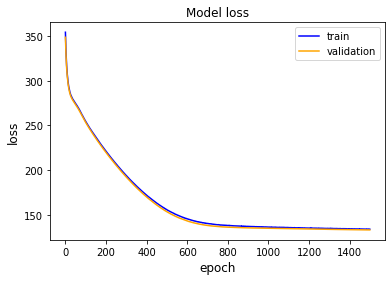

In [23]:
plt.plot(model.history['loss'], color='blue')
plt.plot(model.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [24]:
from mavenn.src.utils import x_to_stats
stats = x_to_stats(x=x_test, alphabet=model.alphabet)
x_ohe_test = stats.pop('x_ohe')

In [25]:
#phi_test = model.x_to_phi(x_test)

In [26]:
model.get_nn().layers

In [27]:
import tensorflow as tf
import tensorflow.keras.backend as K


y_hat_functions = []
yhats = []

# phi_function = K.function([model.get_nn().layers[0].input], [model.get_nn().layers[2].output])
# phi_test = np.squeeze(phi_function(np.hstack([x_ohe_test,y_test])))

for _ in range(y_train.shape[1]):
    y_hat_functions.append(K.function([model.get_nn().layers[0].input], [model.get_nn().layers[2*_+3].output]))
    yhats.append(np.squeeze(y_hat_functions[_](np.hstack([x_ohe_test,y_test]))))

In [28]:
y_train.shape[1]

2

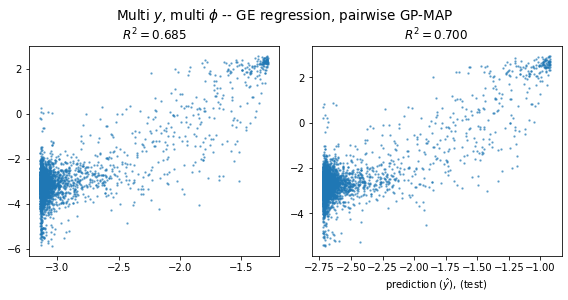

In [36]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

for _ in range(y_train.shape[1]):

    Rsq = np.corrcoef(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_])[0][1]**2
    ax[_].set_title('$R^2 = $' + str(Rsq)[0:5])
    ax[_].scatter(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_],s=2,alpha=0.5)
    #diag = np.linspace(min(y_test[:,_]),max(y_test[:,_]),100)
    #diag = np.linspace(-3,max(y_test[:,_]),100)
    #ax[_].plot(diag,diag,'--',color='black')

ax[_].set_xlabel('prediction $(\hat y)$, (test)')
    
fig.suptitle('Multi $y$, multi $\phi$ -- GE regression, pairwise GP-MAP',y=1.03,fontsize=13.5)    
fig.tight_layout()
#fig.savefig('Multi_y_GE_regression_MPSA_pairwise.png',bbox_inches='tight',dpi=300)

In [30]:
#tf.keras.utils.plot_model(model.get_nn(), show_shapes=False)